# Garment_Worker_Productivity

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set_theme(style="whitegrid")
from tkinter import messagebox, filedialog
tips = sns.load_dataset("tips")
from sklearn.linear_model import LinearRegression

In [ ]:
# Uplode the dataset 

df=pd.read_csv('/content/garments_worker_productivity.csv')

In [ ]:
# Read the dataset

df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
# Chacking the data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

**Data Description**
1. date : Date in MM-DD-YYYY
2. day : Day of the Week
3. quarter : A portion of the month. A month was divided into four quarters
4. department : Associated department with the instance
5. team : Associated team number with the instance
6. no_of_workers : Number of workers in each team
7. no_of_style_change : Number of changes in the style of a particular product
8. targeted_productivity : Targeted productivity set by the Authority for each team for each day.
9. smv : Standard Minute Value, it is the allocated time for a task
10. wip : Work in progress. Includes the number of unfinished items for products
11. over_time : Represents the amount of overtime by each team in minutes
12. incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13. idle_time : The amount of time when the production was interrupted due to several reasons
14. idle_men : The number of workers who were idle due to production interruption
15. actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

# Data Analysis

In [ ]:
# Chacking the data

df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [ ]:
df.shape

(1197, 15)

In [ ]:
# Find NaN value in this dataset
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
# Checking how many feature in the column
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [ ]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [ ]:
# Looking at the sample dataset
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df1=df.copy()

In [ ]:
# Separate categorical data for simplicity in analysis
categorical_features = [feature for feature in df1.columns if((df1[feature].dtypes=='O'))]
categorical_features

['quarter', 'department', 'day']

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [ ]:
# fix department error
df1.loc[:,'department'] = df1.loc[:,'department'].str.strip()
df1['department']=df1['department'].replace(['sewing'],['sewing']) 

In [ ]:
sr = list(df1['department'])
st = list(df1['wip'])

In [ ]:
# Here we see NaN value sewing or not.

f = 0
c = 0
for i in sr:
  if i == 'sewing':
     p = float (st[c])
     if pd.isna(p):
        f = f+1
  c = c+1
f

0

In [ ]:
# Here we count finishing..

f = 0
c = 0
for i in sr:
  if i == 'finishing':
     p = float (st[c])
     if pd.isna(p):
        f = f+1
  c = c+1
f

506

Our total missing value is 506 and total finishing is 506.
All the NaN values are in the finishing fetures

In [ ]:
# Fill all NaN value using 0 

df1 = df1.fillna(0)

In [ ]:
df1.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [ ]:
# df1['date']=pd.to_datetime(df1['date'])
# df1.head()

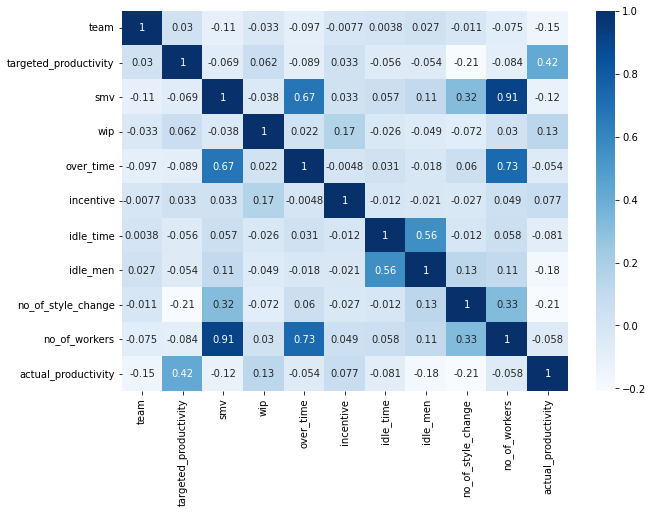

In [ ]:
# checking the correlation among the variables
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")

Hight positive correlation : number_of_workers and smv (0.91), no_of_workers and over_time (0.73), over_time and smv (0.67), idle_men and idle_time(0.56)
Positive Correlation : number_of_workers and no_of_style_change(0.36), no_of_style_shange and smv(0.32)
There is not any obviouf negitave corelation between features.

# Splitting the Month and Year

In [ ]:
# Splitting month 

def date2month(x):
  return x.month

In [ ]:
# There we splitting year

def date2year(x):
  return x.year

In [ ]:
df1['month']=df1['date'].apply(date2month)
df1.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1
5,2015-01-01,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125,1
6,2015-01-01,Quarter1,finishing,Thursday,2,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.755167,1
7,2015-01-01,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683,1
8,2015-01-01,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098,1
9,2015-01-01,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428,1


In [ ]:
df1['year']=df1['date'].apply(date2year)
df1.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,year
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,2015
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,2015
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,2015
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,2015
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,2015
5,2015-01-01,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125,1,2015
6,2015-01-01,Quarter1,finishing,Thursday,2,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.755167,1,2015
7,2015-01-01,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683,1,2015
8,2015-01-01,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098,1,2015
9,2015-01-01,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428,1,2015


In [ ]:
# Now we will remove the date column.
df1=df1.drop(columns='date')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
 14  month                  1197 non-null   int64  
 15  year

In [ ]:
df1.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,year
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,2015
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,2015
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,2015
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,2015
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,2015


# Visualization Columns

In [ ]:
# Cateforical columns visualization

In [ ]:
categorical_features

['quarter', 'department', 'day']

**using** **piechart**

There we using piechart to show all categorical_features.

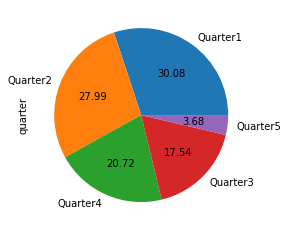

In [ ]:
# show quarter column using pie
df1['quarter'].value_counts().plot(kind='pie', autopct="%.2f")
plt.show()

From above plot we see that quarter 1 is 30.08%, quarter 2 is 27.72%, quarter 3 is 17.54%, quarter 4 is 20.72% and quarter 5 is 3.68%. From above information we can know that minimum work is done in quarter 5.

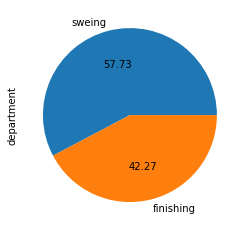

In [ ]:
# show department column
df1['department'].value_counts().plot(kind='pie', autopct="%.2f")
plt.show()

From this plot we see that sweing is 57.73% and finishing is 42.27% and difference between two departments is 15.46% from this information we can know that maximum works done by sweing features and minimum works done by finishing features. 

# Countplot

There we using defarent plot to visualization same column.

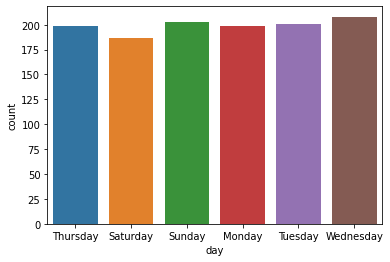

In [ ]:
 sns.countplot(x='day',data=df1)

In this plot we see that Wednesday is more than 200 and another day less than equal to 200. Thursday, Sunday, Monday, Tuesday are almost same and Saturday is low of other day.

There we use another plot to see same column.

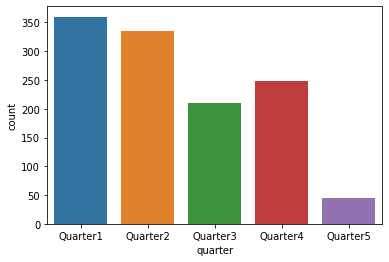

In [ ]:
 sns.countplot(x='quarter',data=df1)

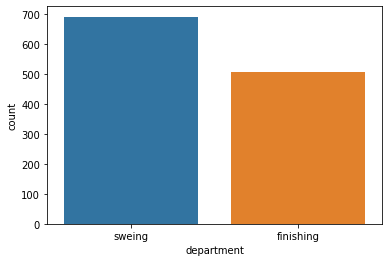

In [ ]:
sns.countplot(x='department',data=df1)

# Bar Plot

There we using bar plot

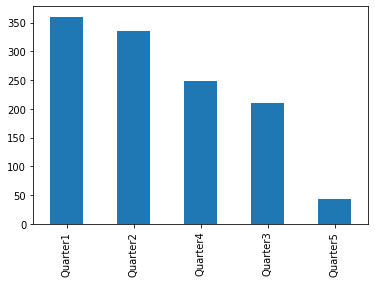

In [ ]:
df1.quarter.value_counts().plot(kind='bar')

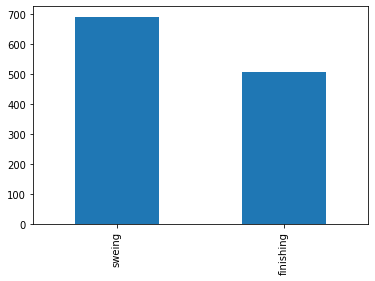

In [ ]:
df1.department.value_counts().plot(kind='bar')

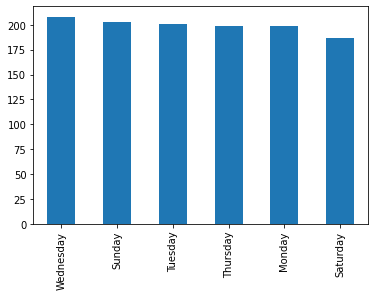

In [ ]:
df1.day.value_counts().plot(kind='bar')

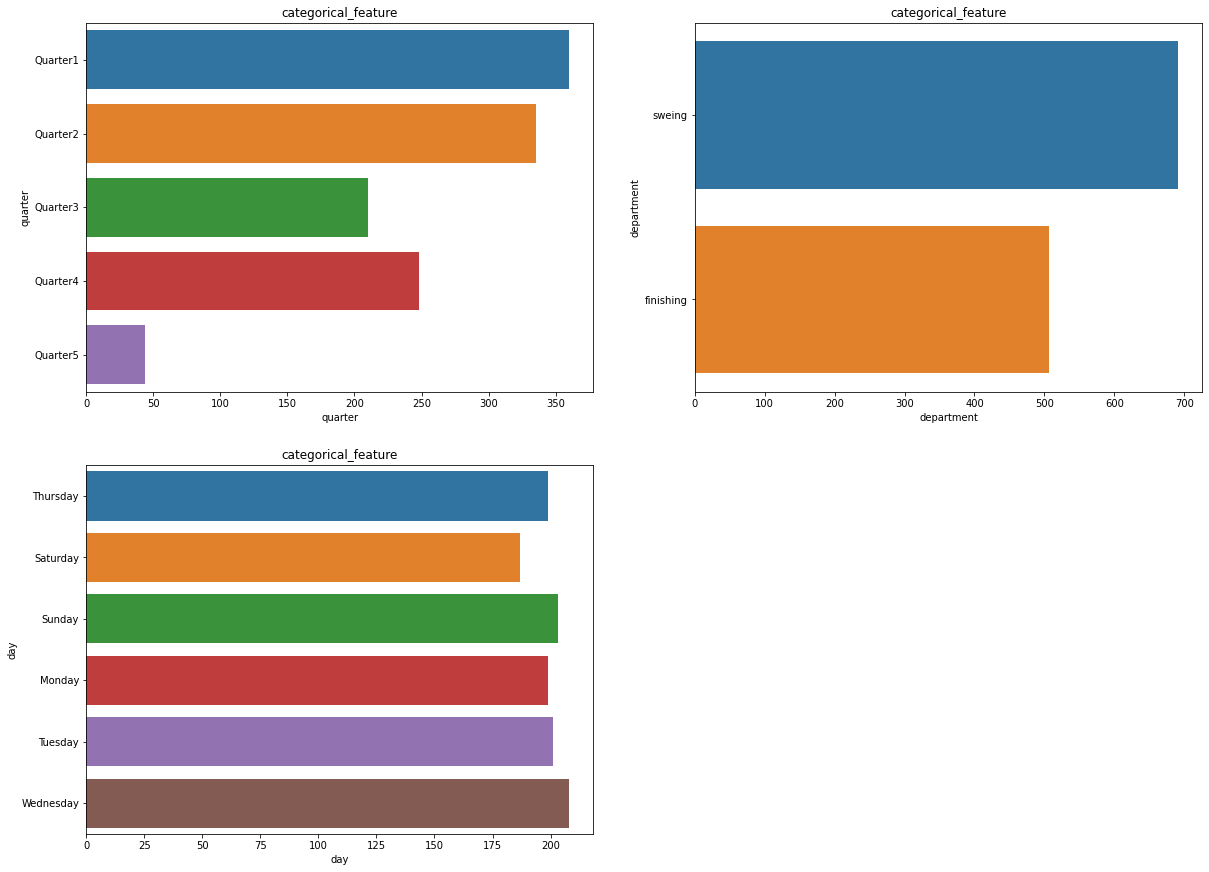

In [ ]:
#check count based on categorical features
plt.figure(figsize=(20,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(10,2,plotnumber)
    sns.countplot(y=categorical_feature,data=df1)
    plt.xlabel(categorical_feature)
    plt.title('categorical_feature')
    plotnumber+=1
plt.show()

In this plot we saw the most work is done in quarter 1. Most of the work is still going on. In Wednesday most of the work is done. And there we visualization all categorical_features using Countplot.

In [ ]:
df1.shape

(1197, 16)

# Numerical Features 

In [ ]:
#df3=df2.copy()

In [ ]:
# Numerical data simplicity in analysis
numerical_features = [feature for feature in df1.columns if((df1[feature].dtypes!='O'))]
numerical_features

['team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity',
 'month',
 'year']

# Using Count Plot

There we using count plot to show numerical_features.

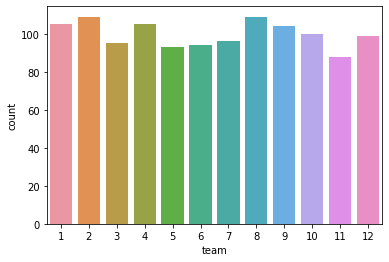

In [ ]:
 sns.countplot(x='team',data=df1)

In this plot we see that 12 teams are present in this plot team1, team2, team4, team8 and team9 are greater than equal to 100 and team 2 and team8 are almost same team2 and team8 are high than other team. But difference among all team is very less. From this information we can know that maximum work is done by team2 and team8 than other team.

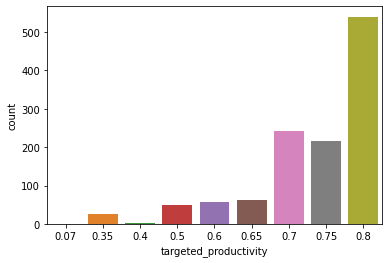

In [ ]:
sns.countplot(x='targeted_productivity',data=df1)

From this plot we see that 0.07 to 0.8 value are present in this plot. Here 0 to 0.65 value are very less and 0.7 to 0.8 value are high 0.8 value in very high than other values. 

# Using Violinplot

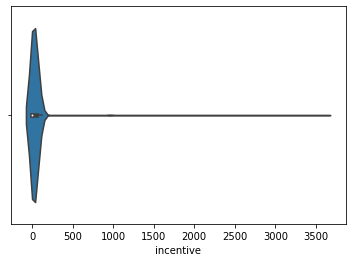

In [ ]:
sns.violinplot(x='incentive',data=df1)
plt.show()

From this plot we see that 0 to 3500 incentive value are present in this features. 500 to 3500 incentive value is very low and o value is very high.

there we use different plot to see same column.

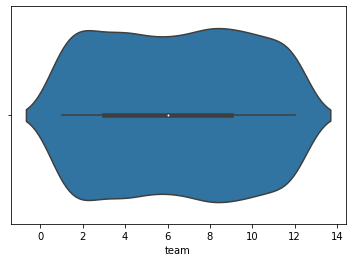

In [ ]:
sns.violinplot(x='team',data=df1)
plt.show()

There we using violinplot to show team column.

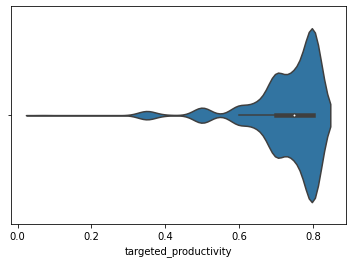

In [ ]:
sns.violinplot(x='targeted_productivity',data=df1)
plt.show()

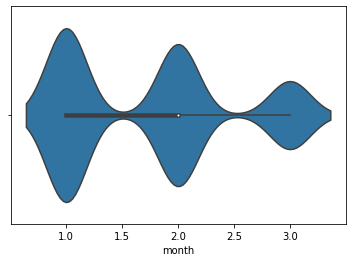

In [ ]:
sns.violinplot(x='month',data=df1)
plt.show()

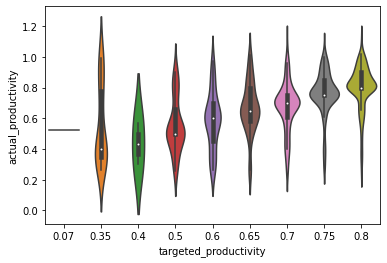

In [ ]:
sns.violinplot(x='targeted_productivity', y='actual_productivity',data=df1)
plt.show()

Using this plot we see targeted_productivity and actual_productivity column.

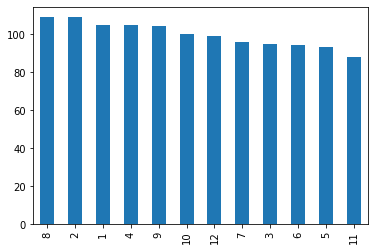

In [ ]:
df1.team.value_counts().plot(kind='bar')

we using bar plot to show team column.

# Using Histplot

Here we use Histplot to show numerical_features in our dataset

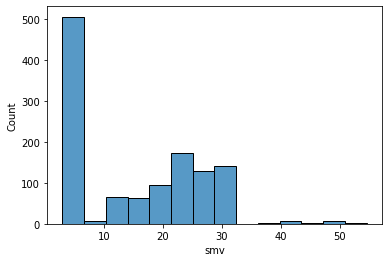

In [ ]:
sns.histplot(x='smv',data=df1)

From above plot we see that 0 to 50 value present in this feature. Here 0 to 30 value are high and 30 to 50 value in very low. 0-10 value are very high than other value. From this information we can know that in SMV 0 to 10 value so much present.

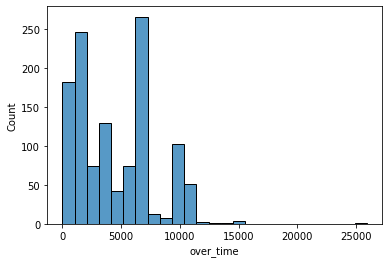

In [ ]:
sns.histplot(x='over_time',data=df1)

From this plot we see that 0 to 25000 value are present in this feature. Here 0 to 10000 value is high and 15000 and 25000 value are low. From this information we can understand in over_time o to 10000 value so much present.

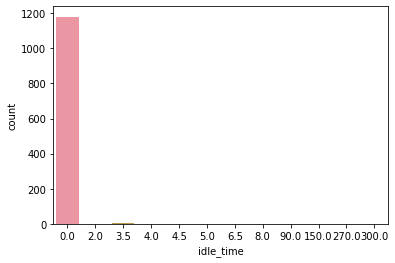

In [ ]:
sns.countplot(x='idle_time',data=df1)

In this plot 0.0 to 300.0 column are present. But every value is present in 0.0 column and little bit value is present in 3.5 column. 

In [ ]:
df1['idle_time'].value_counts()

0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: idle_time, dtype: int64

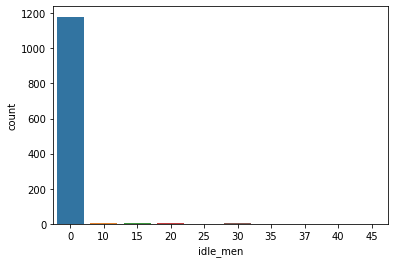

In [ ]:
sns.countplot(x='idle_men',data=df1)

There almost all data is present in 0 value. and little bit present in 10, 15, 20 and 30.

In [ ]:
df1['idle_men'].value_counts()

0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64

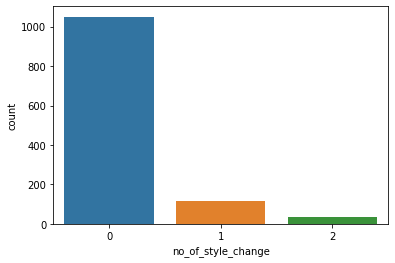

In [ ]:
sns.countplot(x='no_of_style_change',data=df1)

In this plot 0, 1 and 2 value are present in this plot 0 value is very high and 1, 2 values is very low. It means that maximum 0 value is present in this dataset.

In [ ]:
df1['no_of_style_change'].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

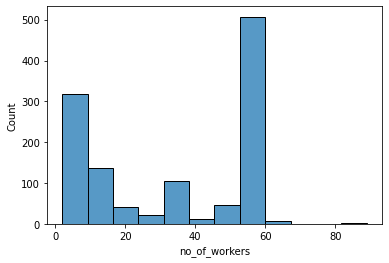

In [ ]:
sns.histplot(x='no_of_workers',data=df1)

From this plot we see that 0 to 80 value are present. In this features near 60 value is very high than other value. Near 70 value are empty. 0 to 40 value are low then neat 60 value. From this information we understand that in no_of_workers 0 to 60 values are present. 

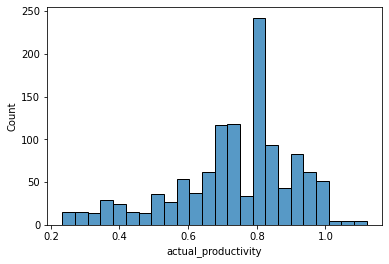

In [ ]:
sns.histplot(x='actual_productivity',data=df1)

In this plot we see that 0.2 – 1.0 value are present in this feature. 0.8 Value is very high than other value. from this information we understan that near 1.0 value so mouch present.

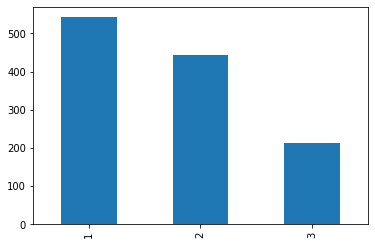

In [ ]:
df1.month.value_counts().plot(kind='bar')

This plot we see that here 3 value are present 1 mean January, 2 mean February and 3 mean March. 1 is very high it touch 500 and 2 is medium it touch 400 and 3 it is low more than outer value its touch 200. Form this information we understand that maximum work is done in January and minimum work is done in March. 

In [ ]:
df1['month'].value_counts()

1    542
2    443
3    212
Name: month, dtype: int64

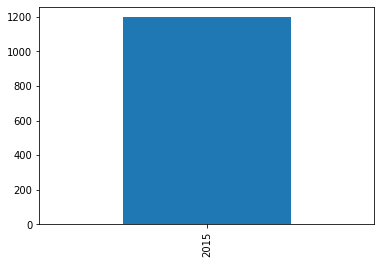

In [ ]:
df1.year.value_counts().plot(kind='bar')

In this plot we have only one vale in this features 2015. All of work are done in this year.

In [ ]:
df1['year'].value_counts()

2015    1197
Name: year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

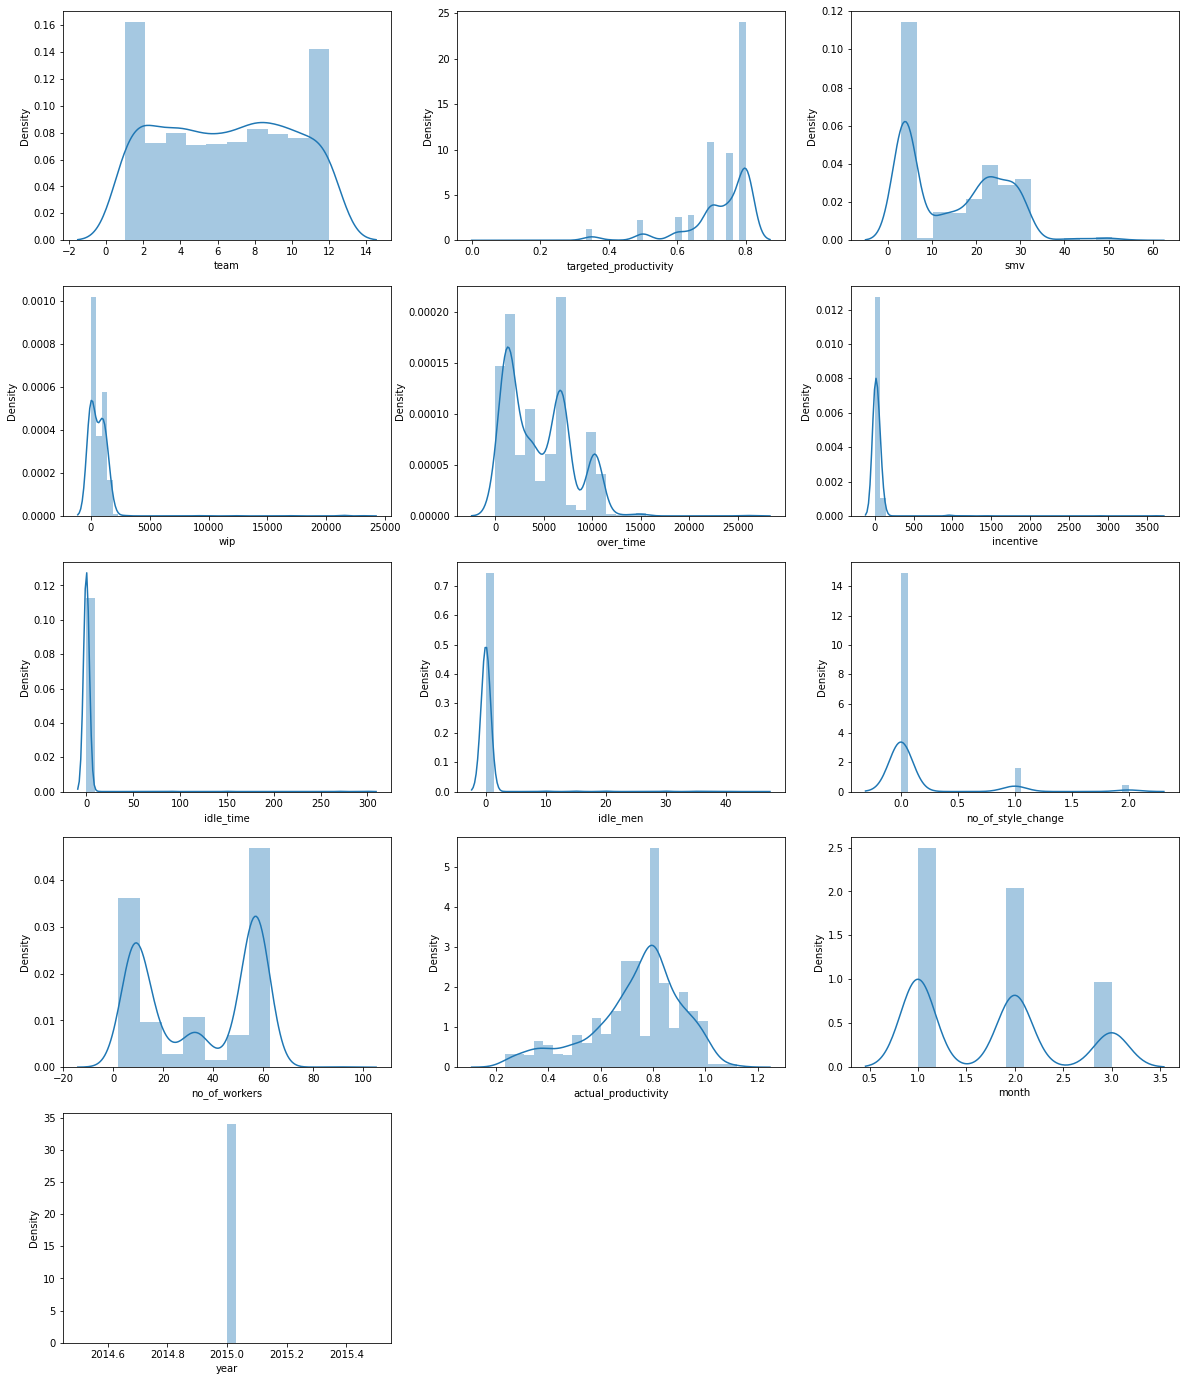

In [ ]:
# show all numerical_features in distplot

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_features in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df1[numerical_features])
    plt.xlabel(numerical_features)
    plotnumber+=1
plt.show()

There is we check symmetric and skew-symmetric matrix in out data set. then we convert skew-symmetric in symmetic. 

# Convert Sematrict data

There we covert all skew-symmetric data. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


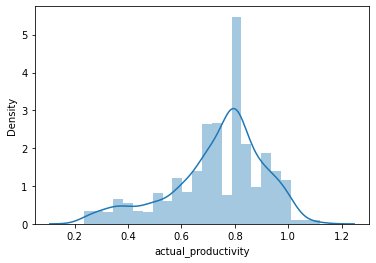

In [ ]:
sns.distplot(df1.actual_productivity)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


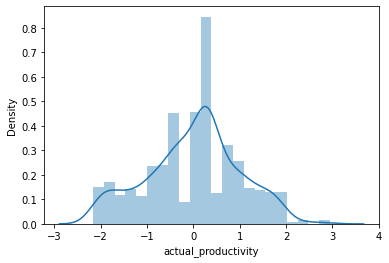

In [ ]:
# Convart actual_productivity

from sklearn.preprocessing import PowerTransformer
p = PowerTransformer(method='box-cox')
df1['actual_productivity']=p.fit_transform(df1[['actual_productivity']])
sns.distplot(df1.actual_productivity)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


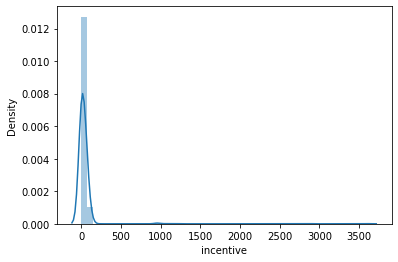

In [ ]:
sns.distplot(df1.incentive)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


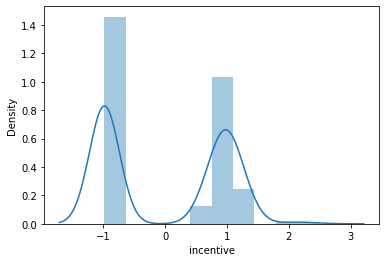

In [ ]:
# convart incentive using yeo-johnson
p = PowerTransformer(method='yeo-johnson')
df1['incentive']=p.fit_transform(df1[['incentive']])
sns.distplot(df1.incentive)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


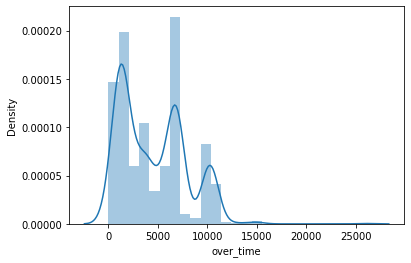

In [ ]:
sns.distplot(df1.over_time)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


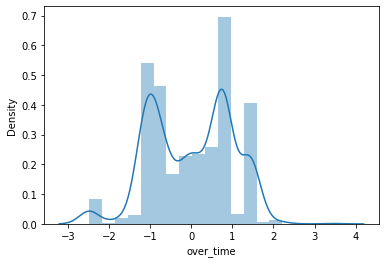

In [ ]:
# convart over_time 
p = PowerTransformer(method='yeo-johnson')
df1['over_time']=p.fit_transform(df1[['over_time']])
sns.distplot(df1.over_time)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


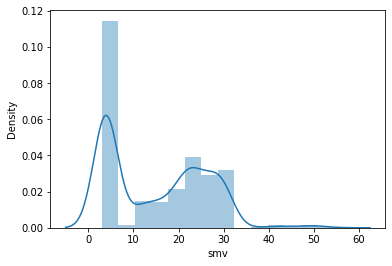

In [ ]:
# convert smv
sns.distplot(df1.smv)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


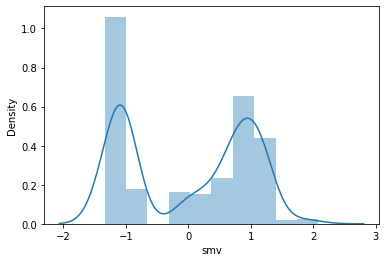

In [ ]:
from sklearn.preprocessing import PowerTransformer
p = PowerTransformer(method='yeo-johnson')
df1['smv']=p.fit_transform(df1[['smv']])
sns.distplot(df1.smv)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


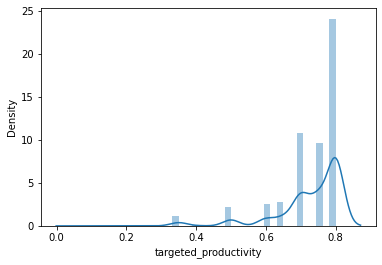

In [ ]:
# convert targeted_productivity
sns.distplot(df1.targeted_productivity)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


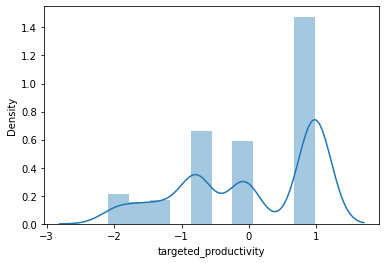

In [ ]:

p = PowerTransformer(method='yeo-johnson')
df1['targeted_productivity']=p.fit_transform(df1[['targeted_productivity']])
sns.distplot(df1.targeted_productivity)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


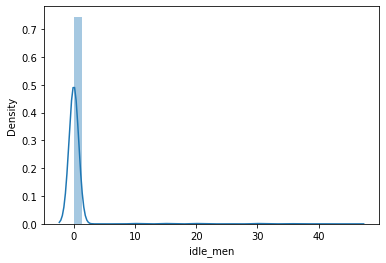

In [ ]:
# convert idle_men
sns.distplot(df1.idle_men)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


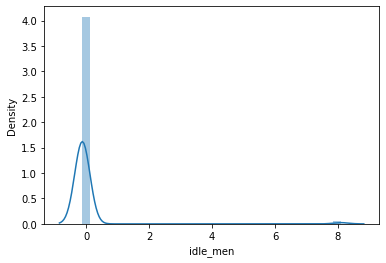

In [ ]:

p = PowerTransformer(method='yeo-johnson')
df1['idle_men']=p.fit_transform(df1[['idle_men']])
sns.distplot(df1.idle_men)

# Outlier Data

Here we use box plot to show outlier data in our dataset.

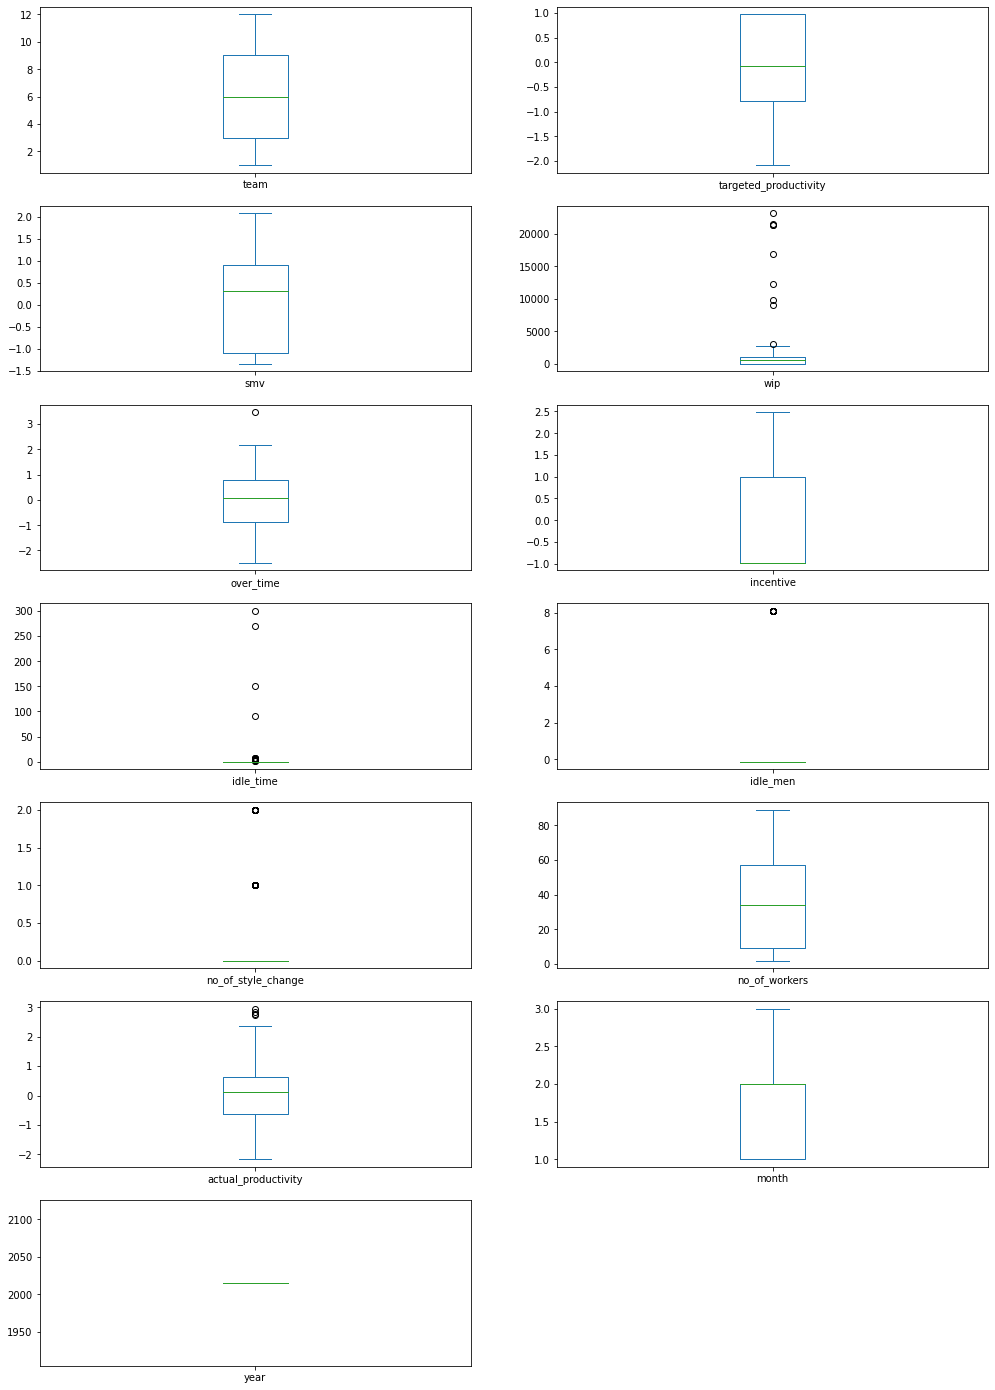

In [ ]:
# Chack outlier data..
df1.plot(kind="box",subplots=True,layout=(7,2),figsize=(17,25));

There is we forund all outliers data in out data set. 

# Remove Outlier Data

And there we delet all outliers data in our data set.

In [ ]:
def outliers(df1, ft):
  Q1 = df1[ft].quantile(0.25)
  Q3 = df1[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df1.index[(df1[ft]< lower_bound) | (df1[ft]> upper_bound)]
  return ls

In [ ]:
index_list = []
for feature in ['targeted_productivity', 'wip', 'incentive', 'idle_men', 'no_of_style_change', 'idle_time', 'over_time', 'actual_productivity','smv']:
  index_list.extend(outliers(df1, feature))

In [ ]:
index_list

[561,
 563,
 564,
 565,
 568,
 569,
 570,
 572,
 573,
 615,
 617,
 650,
 654,
 775,
 798,
 818,
 822,
 841,
 843,
 848,
 860,
 880,
 882,
 996,
 1001,
 1046,
 1085,
 634,
 651,
 671,
 683,
 689,
 690,
 706,
 709,
 710,
 723,
 724,
 726,
 728,
 729,
 740,
 743,
 744,
 746,
 748,
 756,
 759,
 760,
 761,
 763,
 774,
 775,
 777,
 780,
 781,
 784,
 789,
 794,
 796,
 798,
 799,
 800,
 801,
 810,
 812,
 813,
 814,
 817,
 818,
 821,
 822,
 826,
 827,
 832,
 834,
 835,
 840,
 841,
 843,
 847,
 853,
 854,
 855,
 858,
 860,
 862,
 863,
 869,
 874,
 875,
 876,
 877,
 878,
 879,
 880,
 889,
 891,
 893,
 894,
 895,
 896,
 897,
 898,
 907,
 909,
 911,
 912,
 915,
 916,
 917,
 919,
 921,
 922,
 927,
 929,
 930,
 932,
 933,
 934,
 935,
 938,
 939,
 945,
 946,
 950,
 951,
 952,
 953,
 954,
 957,
 958,
 961,
 966,
 968,
 970,
 972,
 973,
 974,
 975,
 978,
 979,
 980,
 1046,
 1066,
 1083,
 1086,
 1093,
 1101,
 1104,
 1105,
 1115,
 1121,
 1122,
 1123,
 1124,
 1134,
 1141,
 1144,
 1145,
 1146,
 1147,
 1159,

In [ ]:
def remove(df1, ls):
  ls = sorted(set(ls))
  df1 = df1.drop(ls)
  return df1

In [ ]:
df1_cleaned = remove(df1, index_list)

In [ ]:
df1_cleaned.shape

(1027, 16)

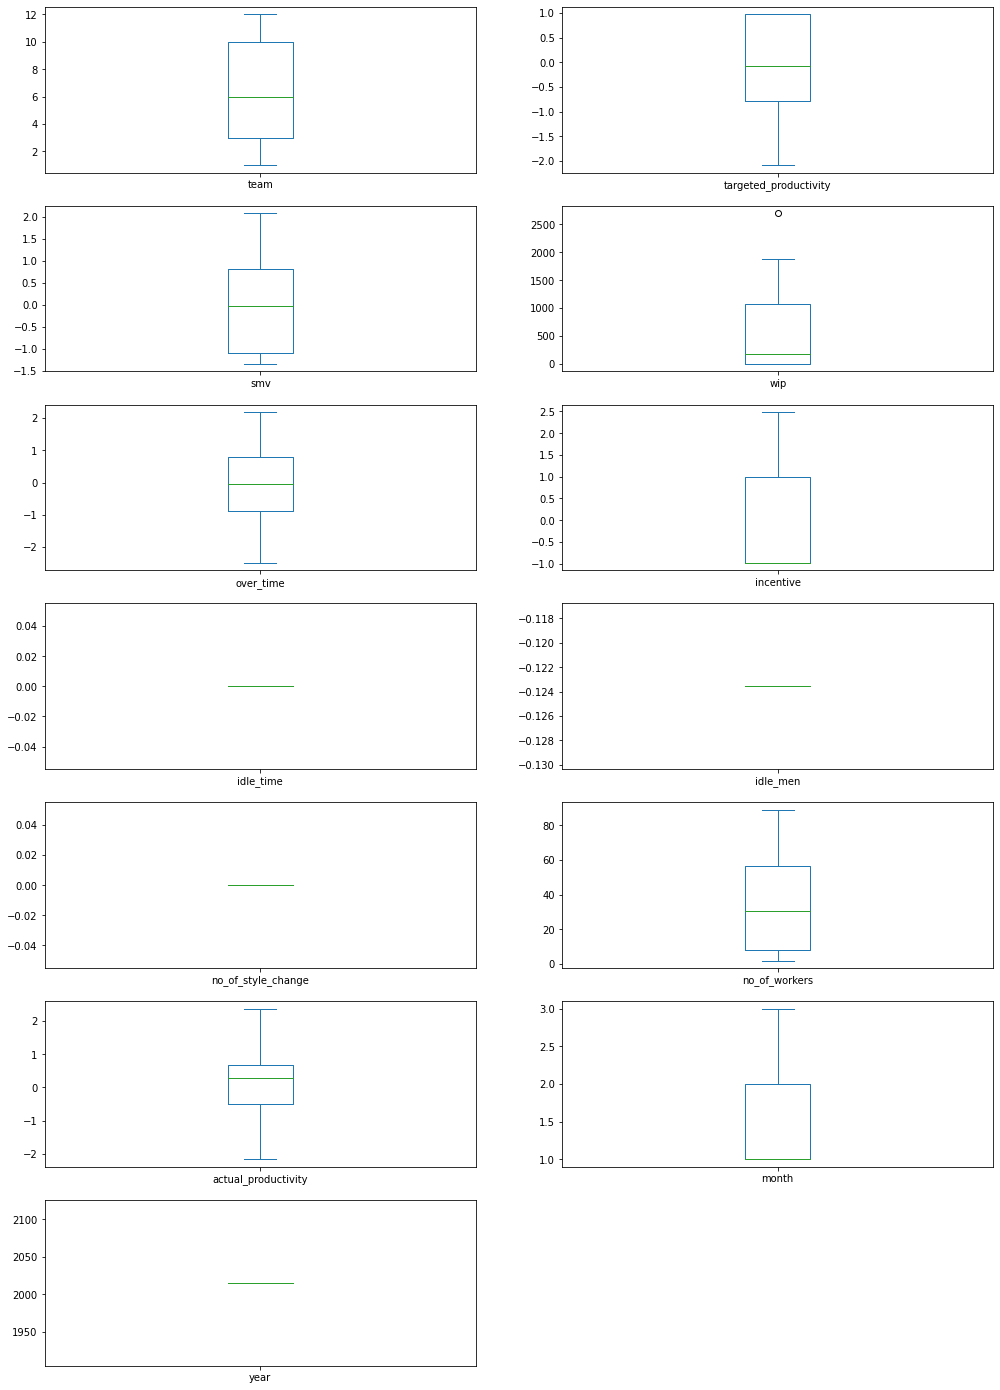

In [ ]:
df1_cleaned.plot(kind="box",subplots=True,layout=(7,2),figsize=(17,25));

Here we have removed all the outlier data from aur data set.

In [ ]:
df1.shape

(1197, 16)

# Data Preprocessing Imputing 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   float64
 8   incentive              1197 non-null   float64
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   float64
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
 14  month                  1197 non-null   int64  
 15  year

In [ ]:
df1['no_of_style_change'].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

In [ ]:
df1[['quarter', 'department', 'day']]

,quarter,department,day
0,Quarter1,sweing,Thursday
1,Quarter1,finishing,Thursday
2,Quarter1,sweing,Thursday
3,Quarter1,sweing,Thursday
4,Quarter1,sweing,Thursday
...,...,...,...
1192,Quarter2,finishing,Wednesday
1193,Quarter2,finishing,Wednesday
1194,Quarter2,finishing,Wednesday
1195,Quarter2,finishing,Wednesday


In [ ]:
# Using Label encoding....

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df1['quarter']= label_encoder.fit_transform(df1['quarter'])
df1['day']= label_encoder.fit_transform(df1['day'])
df1['department']= label_encoder.fit_transform(df1['department'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   int64  
 1   department             1197 non-null   int64  
 2   day                    1197 non-null   int64  
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   float64
 8   incentive              1197 non-null   float64
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   float64
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
 14  month                  1197 non-null   int64  
 15  year

In [ ]:
df1.head(620)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,year
0,0,1,3,8,0.974587,1.017903,1108.0,0.826839,1.259701,0.0,-0.123560,0,59.0,1.342035,1,2015
1,0,0,3,1,-0.075500,-1.087287,0.0,-1.162343,-0.978354,0.0,-0.123560,0,8.0,0.915528,1,2015
2,0,1,3,11,0.974587,-0.018766,968.0,-0.032601,0.989084,0.0,-0.123560,0,30.5,0.293898,1,2015
3,0,1,3,12,0.974587,-0.018766,968.0,-0.032601,0.989084,0.0,-0.123560,0,30.5,0.293898,1,2015
4,0,1,3,6,0.974587,1.004393,1170.0,-0.660958,0.989084,0.0,-0.123560,0,56.0,0.292607,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,0,1,5,5,-1.249547,1.210317,326.0,0.544732,-0.978354,90.0,8.093207,0,58.5,-0.631293,2,2015
616,0,0,5,6,-0.781026,-1.337763,0.0,-1.162343,-0.978354,0.0,-0.123560,0,8.0,-1.225261,2,2015
617,0,1,5,4,-2.042109,1.210317,287.0,0.600905,0.662032,150.0,8.093207,0,55.5,-1.888987,2,2015
618,0,1,3,2,0.974587,0.817891,1300.0,0.762377,1.315278,0.0,-0.123560,0,56.5,1.842522,2,2015


Here is the number given to which fearures after using level encoding.

***Quater :***           
quater1 = 0          
quater2 = 1
quater3 = 2
quater4 = 3
quater5 = 4

***Department :***

sweing = 1

finishing = 0

***Day :***

Wednesday = 5   
Sunday    = 2     
Tuesday   = 4  
Thursday  = 3   
Monday    = 0  
Saturday  = 1

# Train Model

In [ ]:

X=df1.drop(columns='actual_productivity')
y=df1['actual_productivity']


In [ ]:
df1.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,year
0,0,1,3,8,0.974587,1.017903,1108.0,0.826839,1.259701,0.0,-0.12356,0,59.0,1.342035,1,2015
1,0,0,3,1,-0.075500,-1.087287,0.0,-1.162343,-0.978354,0.0,-0.12356,0,8.0,0.915528,1,2015
2,0,1,3,11,0.974587,-0.018766,968.0,-0.032601,0.989084,0.0,-0.12356,0,30.5,0.293898,1,2015
3,0,1,3,12,0.974587,-0.018766,968.0,-0.032601,0.989084,0.0,-0.12356,0,30.5,0.293898,1,2015
4,0,1,3,6,0.974587,1.004393,1170.0,-0.660958,0.989084,0.0,-0.12356,0,56.0,0.292607,1,2015


In [ ]:
X.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,month,year
0,0,1,3,8,0.974587,1.017903,1108.0,0.826839,1.259701,0.0,-0.12356,0,59.0,1,2015
1,0,0,3,1,-0.075500,-1.087287,0.0,-1.162343,-0.978354,0.0,-0.12356,0,8.0,1,2015
2,0,1,3,11,0.974587,-0.018766,968.0,-0.032601,0.989084,0.0,-0.12356,0,30.5,1,2015
3,0,1,3,12,0.974587,-0.018766,968.0,-0.032601,0.989084,0.0,-0.12356,0,30.5,1,2015
4,0,1,3,6,0.974587,1.004393,1170.0,-0.660958,0.989084,0.0,-0.12356,0,56.0,1,2015


In [ ]:
y.head()

0    1.342035
1    0.915528
2    0.293898
3    0.293898
4    0.292607
Name: actual_productivity, dtype: float64

# MultiCollinearity

In [ ]:
df2=df1.copy()

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    #Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = df2.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,quarter,2.582893
1,department,34.405476
2,day,3.155570
3,team,5.190420
4,targeted_productivity,1.342025
5,smv,8.258901
6,wip,1.472734
7,over_time,2.401543
8,incentive,2.934881
9,idle_time,1.307704


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

(957, 15)

In [ ]:
y_train.shape

(957,)

In [ ]:
X_train

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
164,1,1,1,3,-0.075500,0.655093,1075.0,0.826839,0.945568,0.0,-0.12356,0,56.0,-0.040333,1
917,3,1,4,9,-0.781026,0.583691,1068.0,-0.245849,0.775486,0.0,-0.12356,1,52.0,-0.348037,2
1045,0,0,4,6,-0.075500,-1.337763,0.0,-0.126634,-0.978354,0.0,-0.12356,0,8.0,-2.000876,3
130,1,1,3,1,0.974587,1.017903,1189.0,1.494818,1.153698,0.0,-0.12356,0,59.0,0.647032,1
397,3,1,1,4,-0.075500,0.817891,727.0,1.433196,1.243325,0.0,-0.12356,0,57.0,1.021717,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,2,1,0,7,0.974587,1.912630,1040.0,1.433196,0.775486,0.0,-0.12356,0,57.0,-1.016712,1
1163,1,1,4,9,-0.075500,0.583691,1247.0,0.642230,0.945568,0.0,-0.12356,0,52.0,-0.038432,3
1029,0,1,4,12,0.974587,0.324735,983.0,0.092125,0.989084,0.0,-0.12356,0,34.0,0.292744,3
493,3,1,5,8,-0.781026,1.544421,336.0,0.642230,-0.978354,0.0,-0.12356,0,52.0,-1.492535,1


# Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [ ]:
X_test

array([[ 1.30532724,  0.8492485 , -0.87942408, ..., -0.0357295 ,
        -0.04866713, -0.97922789],
       [ 1.30532724, -1.17751164, -0.87942408, ..., -1.20703584,
        -1.02475296, -0.97922789],
       [ 1.30532724, -1.17751164,  0.86786071, ..., -1.02683486,
         0.36403474,  0.36143175],
       ...,
       [ 1.30532724, -1.17751164, -0.29699581, ..., -1.20703584,
         1.59060532, -0.97922789],
       [-1.13769395, -1.17751164, -0.87942408, ..., -1.20703584,
         0.26756453,  1.70209139],
       [ 2.11966763, -1.17751164,  0.28543245, ..., -1.20703584,
        -1.41372986, -0.97922789]])

# Matrix

Here we have changed the matrix of our data  set using Mae, Mse, Rmse, R2.

In [ ]:
from sklearn import metrics
models_metrics = pd.DataFrame(columns = [ 'models','mae','mse', 'rmse' ,'mape', 'R2'])
def evaluate_model(model,Y_actual,Y_Predicted, df): 
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    mae=metrics.mean_absolute_error(Y_actual, Y_Predicted)
    mse=metrics.mean_squared_error(Y_actual, Y_Predicted)
    rmse=np.sqrt(metrics.mean_squared_error(Y_actual, Y_Predicted))
    r2 = metrics.r2_score(Y_actual, Y_Predicted)
    df2 = {'models':model,'mae':mae,'mse':mse, 'rmse':rmse, 'mape':mape, 'R2': r2}
    df2 = df2.append(df2, ignore_index = True)
    return df2

    print (rmse)

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict

In [ ]:
#using the function to show ANN models.
model1 = []
model2 = []
model3 = []
ann_result = np.zeros(3)
ann_model_name= ['ANN 1 ', 'ANN 2 ', 'ANN 3']
#============================================================

#model_name = ['Linear Regression ', ' Decision Tree', 'SVM']

Here we use some regression.

# Using LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Model prediction
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('Linear Regression')
print('R2 square:',metrics.r2_score(y_test, y_pred))
model1.append(metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

Linear Regression
R2 square: 1.0
MAE:  9.710006236562929e-16
MSE:  1.4595210731231492e-30



# Using DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_re = DecisionTreeRegressor(random_state=0)
dec_re.fit(X_train, y_train)

# Model prediction
y_pred = dec_re.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('Decision Tree Regressor')
print('R2 square:',metrics.r2_score(y_test, y_pred))
model2.append(metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

Decision Tree Regressor
R2 square: 0.9996376466448735
MAE:  0.007430554211216142
MSE:  0.00038797499410692544



# SVM

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

# Model prediction
y_pred = svr.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('SVM')
print('R2 square:',metrics.r2_score(y_test, y_pred))
model3.append(metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')


SVM
R2 square: 0.977066737610753
MAE:  0.09025105387203199
MSE:  0.02455485016059866



# Building ANN Models

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [ ]:
# ANN1 model

ANN = Sequential()
ANN.add(Dense(32,activation='relu'))
ANN.add(Dense(32,activation='relu'))
ANN.add(Dense(32,activation='relu'))
ANN.add(Dense(16,activation='relu'))
ANN.add(Dense(16,activation='relu'))
ANN.add(Dense(8,activation='relu'))
ANN.add(Dense(8,activation='relu'))
ANN.add(Dense(2,activation='relu'))
ANN.add(Dense(2,activation='relu'))
ANN.add(Dense(1))

In [ ]:
from tensorflow.keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
from typing_extensions import Annotated
ANN.compile(optimizer=tf.keras.optimizers.RMSprop(),
             loss='mean_squared_error',
             metrics=['mean_squared_error'])

In [ ]:
ANN.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=32,epochs=300)

Epoch 1/300
30/30 [==============================] - 2s 11ms/step - loss: 0.9289 - mean_squared_error: 0.9289 - val_loss: 0.8833 - val_mean_squared_error: 0.8833
Epoch 2/300
30/30 [==============================] - 0s 4ms/step - loss: 0.6854 - mean_squared_error: 0.6854 - val_loss: 0.5905 - val_mean_squared_error: 0.5905
Epoch 3/300
30/30 [==============================] - 0s 4ms/step - loss: 0.4884 - mean_squared_error: 0.4884 - val_loss: 0.5042 - val_mean_squared_error: 0.5042
Epoch 4/300
30/30 [==============================] - 0s 3ms/step - loss: 0.4363 - mean_squared_error: 0.4363 - val_loss: 0.4713 - val_mean_squared_error: 0.4713
Epoch 5/300
30/30 [==============================] - 0s 3ms/step - loss: 0.4084 - mean_squared_error: 0.4084 - val_loss: 0.4455 - val_mean_squared_error: 0.4455
Epoch 6/300
30/30 [==============================] - 0s 3ms/step - loss: 0.3835 - mean_squared_error: 0.3835 - val_loss: 0.4150 - val_mean_squared_error: 0.4150
Epoch 7/300
30/30 [==============

In [ ]:
# list of all data in history
ANN.history.history

{'loss': [0.9288942217826843,
  0.6853635907173157,
  0.4884382486343384,
  0.4362673759460449,
  0.40844857692718506,
  0.38349801301956177,
  0.36306655406951904,
  0.34360814094543457,
  0.3258418142795563,
  0.308592826128006,
  0.2929830551147461,
  0.279324471950531,
  0.263959139585495,
  0.2519524097442627,
  0.2372833639383316,
  0.22679799795150757,
  0.21499685943126678,
  0.20592427253723145,
  0.1940881609916687,
  0.18313832581043243,
  0.1750764548778534,
  0.16494660079479218,
  0.15647229552268982,
  0.14884547889232635,
  0.14098072052001953,
  0.13273687660694122,
  0.12648704648017883,
  0.11972516030073166,
  0.11318088322877884,
  0.10659566521644592,
  0.10213886946439743,
  0.0953700840473175,
  0.09088315814733505,
  0.08583961427211761,
  0.08109740912914276,
  0.07638731598854065,
  0.07292664051055908,
  0.06862590461969376,
  0.06549682468175888,
  0.061404161155223846,
  0.05830926075577736,
  0.054887209087610245,
  0.05313436686992645,
  0.05026275292038

In [ ]:
dfl_RMS= pd.DataFrame(ANN.history.history)

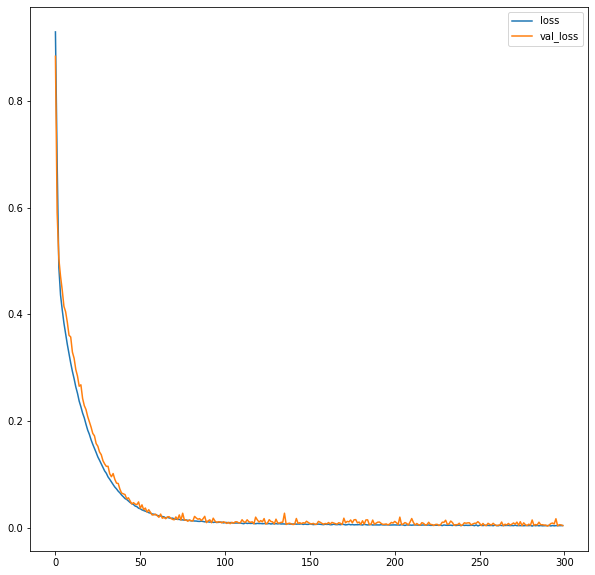

In [ ]:
dfl_RMS[['loss', 'val_loss']].plot(figsize=(10,10))

In [ ]:
ann_result[0]=np.round(ANN.evaluate(X_test, y_test, verbose=0)[1], 3)

In [ ]:
ann_result[0]

0.004

In [ ]:
# ANN2 model

ANN1 = Sequential()
ANN1.add(Dense(64,activation='relu'))
ANN1.add(Dense(32,activation='relu'))

ANN1.add(Dense(16,activation='relu'))

ANN1.add(Dense(8,activation='relu'))

ANN1.add(Dense(2,activation='relu'))

ANN1.add(Dense(1))

In [ ]:
ANN1.compile(optimizer=tf.keras.optimizers.RMSprop(),
             loss='mean_squared_error',
             metrics=['mean_squared_error'])

In [ ]:
ANN1.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=32,epochs=300)

Epoch 1/300
30/30 [==============================] - 1s 9ms/step - loss: 0.6661 - mean_squared_error: 0.6661 - val_loss: 0.5897 - val_mean_squared_error: 0.5897
Epoch 2/300
30/30 [==============================] - 0s 4ms/step - loss: 0.5132 - mean_squared_error: 0.5132 - val_loss: 0.5460 - val_mean_squared_error: 0.5460
Epoch 3/300
30/30 [==============================] - 0s 4ms/step - loss: 0.4790 - mean_squared_error: 0.4790 - val_loss: 0.5110 - val_mean_squared_error: 0.5110
Epoch 4/300
30/30 [==============================] - 0s 3ms/step - loss: 0.4544 - mean_squared_error: 0.4544 - val_loss: 0.4945 - val_mean_squared_error: 0.4945
Epoch 5/300
30/30 [==============================] - 0s 3ms/step - loss: 0.4370 - mean_squared_error: 0.4370 - val_loss: 0.4660 - val_mean_squared_error: 0.4660
Epoch 6/300
30/30 [==============================] - 0s 3ms/step - loss: 0.4133 - mean_squared_error: 0.4133 - val_loss: 0.4459 - val_mean_squared_error: 0.4459
Epoch 7/300
30/30 [===============

In [ ]:
#list of all data in history
ANN1.history.history

{'loss': [0.6661311388015747,
  0.5131664872169495,
  0.4789564311504364,
  0.4543781280517578,
  0.4369639456272125,
  0.4133322834968567,
  0.3966832458972931,
  0.3779714107513428,
  0.3615626394748688,
  0.34585344791412354,
  0.33071020245552063,
  0.3136346936225891,
  0.299581378698349,
  0.28608089685440063,
  0.27285271883010864,
  0.2608681321144104,
  0.24776703119277954,
  0.2377956509590149,
  0.22433127462863922,
  0.21456992626190186,
  0.20395249128341675,
  0.19414006173610687,
  0.1836048811674118,
  0.1747613400220871,
  0.165680930018425,
  0.15646591782569885,
  0.14828447997570038,
  0.141864612698555,
  0.13324353098869324,
  0.12601757049560547,
  0.11927921324968338,
  0.11330992728471756,
  0.10581863671541214,
  0.10113848745822906,
  0.09411369264125824,
  0.08977922797203064,
  0.08426463603973389,
  0.07962530851364136,
  0.07551378011703491,
  0.07113511115312576,
  0.0660242810845375,
  0.06342919915914536,
  0.05908806622028351,
  0.054960377514362335,


In [ ]:
dfl2_RMS= pd.DataFrame(ANN1.history.history)

In [ ]:
dfl2_RMS

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,0.666131,0.666131,0.589729,0.589729
1,0.513166,0.513166,0.546004,0.546004
2,0.478956,0.478956,0.511010,0.511010
3,0.454378,0.454378,0.494548,0.494548
4,0.436964,0.436964,0.465960,0.465960
...,...,...,...,...
295,0.001323,0.001323,0.018332,0.018332
296,0.001780,0.001780,0.016595,0.016595
297,0.001855,0.001855,0.016710,0.016710
298,0.001323,0.001323,0.019089,0.019089


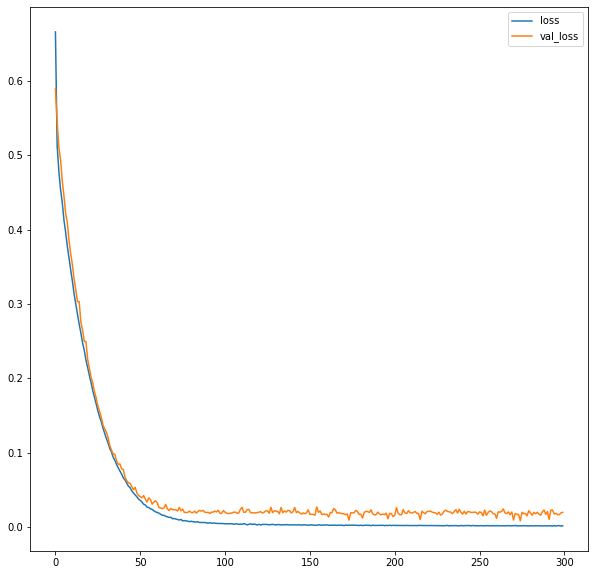

In [ ]:
# There we see loss and val_loss.
dfl2_RMS[['loss', 'val_loss']].plot(figsize=(10,10))

In [ ]:
ann_result[1]=np.round(ANN1.evaluate(X_test, y_test, verbose=0)[1], 3)


In [ ]:
ann_result[1]

0.02

In [ ]:
#ANN3 model

ANN2 = Sequential()
ANN2.add(Dense(64,activation='relu'))
ANN2.add(Dense(64,activation='relu'))
ANN2.add(Dense(32,activation='relu'))
ANN2.add(Dense(32,activation='relu'))
ANN2.add(Dense(16,activation='relu'))
ANN2.add(Dense(16,activation='relu'))
ANN2.add(Dense(8,activation='relu'))
ANN2.add(Dense(8,activation='relu'))
ANN2.add(Dense(2,activation='relu'))
ANN2.add(Dense(2,activation='sigmoid'))
ANN2.add(Dense(1))

In [ ]:
ANN2.compile(optimizer=tf.keras.optimizers.RMSprop(),
             loss='mean_squared_error',
             metrics=['mean_squared_error'])

In [ ]:
ANN2.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=32,epochs=100)

Epoch 1/100
30/30 [==============================] - 2s 13ms/step - loss: 0.8916 - mean_squared_error: 0.8916 - val_loss: 0.7203 - val_mean_squared_error: 0.7203
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 0.5215 - mean_squared_error: 0.5215 - val_loss: 0.4500 - val_mean_squared_error: 0.4500
Epoch 3/100
30/30 [==============================] - 0s 5ms/step - loss: 0.3487 - mean_squared_error: 0.3487 - val_loss: 0.3015 - val_mean_squared_error: 0.3015
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 0.2437 - mean_squared_error: 0.2437 - val_loss: 0.2230 - val_mean_squared_error: 0.2230
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 0.1897 - mean_squared_error: 0.1897 - val_loss: 0.1680 - val_mean_squared_error: 0.1680
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 0.1539 - mean_squared_error: 0.1539 - val_loss: 0.1425 - val_mean_squared_error: 0.1425
Epoch 7/100
30/30 [==============

In [ ]:
# list all data in history
ANN2.history.history

{'loss': [0.8916318416595459,
  0.5214542150497437,
  0.3486550450325012,
  0.2437446415424347,
  0.1896829456090927,
  0.153887540102005,
  0.1367885172367096,
  0.13456039130687714,
  0.1206967830657959,
  0.12085825949907303,
  0.11397944390773773,
  0.09984287619590759,
  0.10313699394464493,
  0.0952472984790802,
  0.09176996350288391,
  0.08871939778327942,
  0.07993005961179733,
  0.08233378827571869,
  0.07661759108304977,
  0.0713425725698471,
  0.07049331814050674,
  0.06785144656896591,
  0.06893127411603928,
  0.05836576223373413,
  0.0583261139690876,
  0.06192811578512192,
  0.056099191308021545,
  0.05142777040600777,
  0.05208124965429306,
  0.050533998757600784,
  0.04877704754471779,
  0.04558790847659111,
  0.04482218995690346,
  0.04475885629653931,
  0.04244038090109825,
  0.041278522461652756,
  0.039583999663591385,
  0.03704538941383362,
  0.03652321919798851,
  0.034979887306690216,
  0.035582032054662704,
  0.03562801331281662,
  0.03187600150704384,
  0.03038

In [ ]:
dfl3_RMS= pd.DataFrame(ANN2.history.history)

In [ ]:
dfl3_RMS

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,0.891632,0.891632,0.720253,0.720253
1,0.521454,0.521454,0.450020,0.450020
2,0.348655,0.348655,0.301520,0.301520
3,0.243745,0.243745,0.223027,0.223027
4,0.189683,0.189683,0.167990,0.167990
...,...,...,...,...
95,0.011464,0.011464,0.015609,0.015609
96,0.011643,0.011643,0.011588,0.011588
97,0.010951,0.010951,0.016629,0.016629
98,0.008824,0.008824,0.031710,0.031710


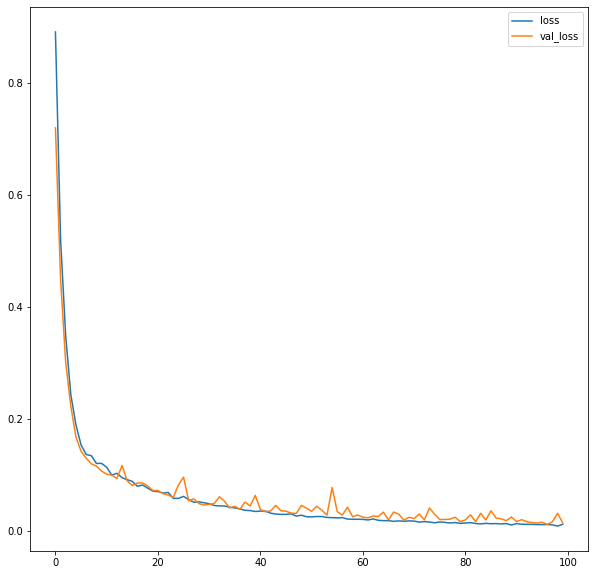

In [ ]:
dfl3_RMS[['loss', 'val_loss']].plot(figsize=(10,10))

In [ ]:
ann_result[2]=np.round(ANN2.evaluate(X_test, y_test, verbose=0)[1], 3)

In [ ]:
ann_result[2]

0.015

In [ ]:
# we make a dataframe for models results 
df = pd.DataFrame(data=ann_model_name,columns=['Model_Name'])
df1 = pd.DataFrame(data=ann_result,columns=['Result'])
result = pd.concat([df,df1],axis=1)

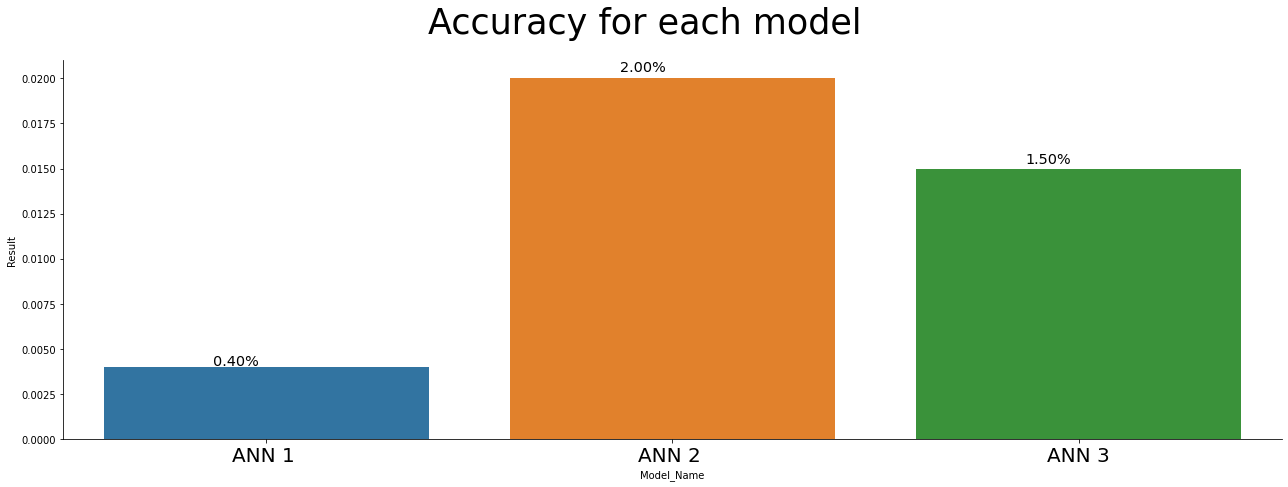

In [ ]:
g = sns.catplot(x='Model_Name', y='Result', data=result,
                height=6, aspect=3, kind='bar', legend=True)
g.fig.suptitle('Accuracy for each model', size=35, y=1.1)
ax = g.facet_axis(0,0)
ax.tick_params(axis='x', which='major', labelsize=20)
#============================================================
# for printing persentage
for p in ax.patches:
    ax.text(p.get_x() + 0.27,
            p.get_height() * 1.02,
           '{0:.2f}%'.format(p.get_height()*100),
            color='black',
            rotation='horizontal',
            size='x-large')